# Symptom and Disease Prediction Project

This project aims to develop a machine learning model for predicting diseases based on symptoms using various Python libraries such as TensorFlow, Pandas, NumPy, Seaborn, Matplotlib, and scikit-learn.

# TABLE OF CONTENT 
Data loading and exploring

Data preprocessing

Text vectorization (tokenization)

Embedding

Naive bayes

Conv1D model

Transfer learning (USE)

## Introduction

In this project, we build a predictive model that takes symptoms as input and predicts the most probable diseases associated with those symptoms. The project utilizes machine learning techniques and popular Python libraries to accomplish this task.

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [62]:
data = pd.read_csv('Symptom & Disease.csv')
data

,Unnamed: 0,label,text
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."
...,...,...,...
1195,295,diabetes,I'm shaking and trembling all over. I've lost ...
1196,296,diabetes,"Particularly in the crevices of my skin, I hav..."
1197,297,diabetes,I regularly experience these intense urges and...
1198,298,diabetes,"I have trouble breathing, especially outside. ..."


In [63]:
data['label'].unique()

array(['Psoriasis', 'Varicose Veins', 'Typhoid', 'Chicken pox',
       'Impetigo', 'Dengue', 'Fungal infection', 'Common Cold',
       'Pneumonia', 'Dimorphic Hemorrhoids', 'Arthritis', 'Acne',
       'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Jaundice', 'Malaria',
       'urinary tract infection', 'allergy',
       'gastroesophageal reflux disease', 'drug reaction',
       'peptic ulcer disease', 'diabetes'], dtype=object)

In [64]:
data['label'].value_counts()

Psoriasis                          50
Varicose Veins                     50
peptic ulcer disease               50
drug reaction                      50
gastroesophageal reflux disease    50
allergy                            50
urinary tract infection            50
Malaria                            50
Jaundice                           50
Cervical spondylosis               50
Migraine                           50
Hypertension                       50
Bronchial Asthma                   50
Acne                               50
Arthritis                          50
Dimorphic Hemorrhoids              50
Pneumonia                          50
Common Cold                        50
Fungal infection                   50
Dengue                             50
Impetigo                           50
Chicken pox                        50
Typhoid                            50
diabetes                           50
Name: label, dtype: int64

In [65]:
num_of_classes = data['label'].nunique()
num_of_classes

24

In [66]:
data['text'][0]

'I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches.'

In [67]:
data['text'][2]

'I have been experiencing joint pain in my fingers, wrists, and knees. The pain is often achy and throbbing, and it gets worse when I move my joints.'

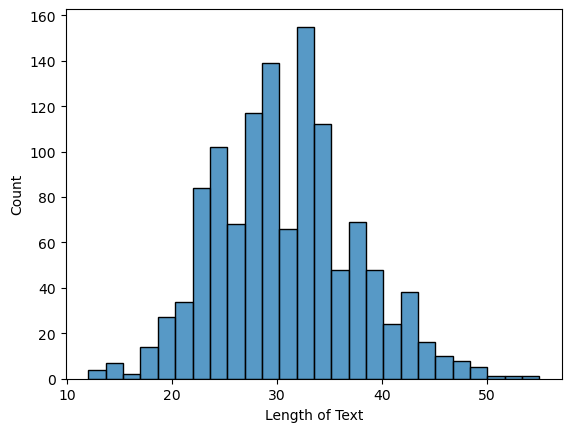

In [68]:
text_length = data['text'].apply(lambda x: len(x.split(' ')))
sns.histplot(text_length)
plt.xlabel('Length of Text')
plt.show()

## Data preprocessing

In [69]:
X = np.array(data['text'])
y = np.array(data['label'])

print(X.shape)
print(y.shape)

(1200,)
(1200,)


In [70]:
from sklearn.model_selection import train_test_split

train_sentences, test_sentences, train_label, test_label = train_test_split(X, y, 
                                                                             test_size=0.1, 
                                                                             random_state=42)


In [71]:
train_sentences[:5]

array(["I've been experiencing muscular weakness and stiffness in my neck recently. My joints have enlarged, making it difficult for me to move. Walking has also been difficult.",
       'I have been getting blood in my pee. Sometimes I get nauseous while peeing. This often almost coincides with me having a high temperature',
       "I have a persistent sour taste in my mouth, even when I haven't eaten anything acidic. I get frequent hiccups and a feeling of lump in my throat.",
       "My monthly cycle has changed, and I've had an unexpected vaginal discharge. I frequently experience mood swings and experience occasional agitation.",
       "My fever is really high, and I'm having trouble catching my breath. I'm sweating a lot, feeling cold and tired, and my heart is beating really fast. I also have some brownish phlegm coming up."],
      dtype=object)

In [72]:
train_label[:5]

array(['Arthritis', 'urinary tract infection',
       'gastroesophageal reflux disease', 'drug reaction', 'Pneumonia'],
      dtype=object)

In [73]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_label)
test_labels_encoded = label_encoder.fit_transform(test_label)

In [74]:
test_labels_encoded[:5]

array([19, 12, 16, 14, 17])

In [75]:
train_sentences.shape, train_labels_encoded.shape

((1080,), (1080,))

In [76]:
sent_lens = [len(sentence.split()) for sentence in train_sentences]
sent_lens[:10]

[27, 24, 28, 21, 35, 23, 47, 21, 27, 40]

In [77]:
avg_len = np.mean(sent_lens)
avg_len

30.677777777777777

In [78]:
min(sent_lens), max(sent_lens)

(12, 55)

In [79]:
out_len_seq = np.percentile(sent_lens, 95)
out_len_seq

43.0

## Text vectorization (tokenization)

Breaking down the text into individual words or tokens.

Removing unnecessary characters, punctuation, and stopwords (common words like "and," "the," "is," etc. that do not carry significant meaning).

Assigning numerical values to each token. There are various methods for this, such as one-hot encoding, count vectorization, TF-IDF (Term Frequency-Inverse Document Frequency), or word embeddings (such as Word2Vec or GloVe), which capture semantic meaning.

Normalizing the vectors to ensure they have similar ranges and do not dominate the model's training process.

Creating a matrix representation of the vectors, where each row corresponds to a document or text sample, and each column represents a unique feature or token.

In [80]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [81]:
text_vectorizer = TextVectorization(
    max_tokens=None,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    ngrams=None,
    output_mode='int',
    output_sequence_length=None)

In [82]:
max_vocab_length = 10000
max_length = 45
text_vectorizer = TextVectorization(
    max_tokens=max_vocab_length,
    output_mode='int',
    output_sequence_length=max_length)

The text_vectorizer object can be used to preprocess and vectorize the text data in the subsequent steps of machine learning pipeline.

In [83]:
text_vectorizer.adapt(train_sentences)

In [84]:
import random
random_sentence = random.choice(train_sentences)
print(random_sentence)
print(text_vectorizer([random_sentence]))

I'm having a lot of trouble with my bowel movements lately. It's hard to go and it hurts when I do. My anus is really sore and it's been bleeding when I go. It's really painful and I'm really uncomfortable.
tf.Tensor(
[[ 23  33   5  17  10  77  24   3 236 406 132  41 123   9  75   2  22  46
   39   4 113   3 104  12  18 125   2  41   6 339  39   4  75  41  18  60
    2  23  18  68   0   0   0   0   0]], shape=(1, 45), dtype=int64)


# Embedding

Embedding is used to improve performance on tasks such as text classification, sentiment analysis, machine translation, and named entity recognition. The word embeddings provide a dense and continuous representation of words, enabling the models to leverage the semantic relationships between words for better understanding and generalization.

In [85]:
from tensorflow.keras import layers
embedding = layers.Embedding(input_dim=max_vocab_length, 
                             output_dim=128, 
                             input_length=max_length,
                             embeddings_initializer='uniform')
embedding

In [86]:
print(embedding(text_vectorizer([random_sentence])))

tf.Tensor(
[[[-0.00238377 -0.00274056  0.00427029 ... -0.01252372 -0.04502002
    0.03404686]
  [ 0.02136853 -0.0143672  -0.02119702 ...  0.02896854  0.02169556
    0.00963604]
  [-0.04931315 -0.01944212 -0.04350328 ...  0.00479565 -0.03083564
    0.02789309]
  ...
  [-0.01201159  0.03672897  0.01284346 ...  0.03914169 -0.00506444
    0.04764872]
  [-0.01201159  0.03672897  0.01284346 ...  0.03914169 -0.00506444
    0.04764872]
  [-0.01201159  0.03672897  0.01284346 ...  0.03914169 -0.00506444
    0.04764872]]], shape=(1, 45, 128), dtype=float32)


# Naive Bayes

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [88]:
model_0 = Pipeline([("tfidf", TfidfVectorizer()),
        ("clf", MultinomialNB()),])

model_0.fit(train_sentences, train_label)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [89]:
baseline_score = model_0.score(test_sentences, test_label)

print(baseline_score*100)

93.33333333333333


# CONVOLUTIONAL NEURAL NETWORK - CNN (Conv1D model)

Conv1D applies a convolutional operation over the input sequence, extracting local patterns or features through a sliding window of fixed size. This operation involves a set of learnable filters or kernels that slide across the input sequence, performing element-wise multiplications and aggregating the results. The resulting feature maps capture important information at different levels of abstraction.

In [90]:
import tensorflow as tf
from tensorflow.keras import layers

# Create a TextVectorization layer
text_vectorizer = layers.TextVectorization(max_tokens=1000, output_mode='int')
text_vectorizer.adapt(train_sentences)

# Define the vocabulary size and embedding dimension
vocab_size = len(text_vectorizer.get_vocabulary())
embedding_dim = 100  # Replace with your desired embedding dimension

# Rest of the model definition
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim)(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(num_of_classes, activation="sigmoid")(x)

model_1 = tf.keras.Model(inputs, outputs, name="dense_model")


In [91]:
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
optimizer = tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [92]:
train_sentences.shape, train_label.shape

((1080,), (1080,))

In [93]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)

train_labels_one_hot = one_hot_encoder.fit_transform(train_label.reshape(-1, 1))

test_labels_one_hot = one_hot_encoder.fit_transform(test_label.reshape(-1, 1))

train_labels_one_hot[:5]


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]])

In [94]:
test_labels_one_hot.shape

(120, 24)

In [95]:
type(train_sentences), type(np.array(train_sentences)), type(train_labels_one_hot)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [96]:
train_labels_one_hot[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]])

In [99]:
model_1_history = model_1.fit(np.array(train_sentences), 
                              train_labels_one_hot,
                              epochs=100,
                              validation_data=(np.array(test_sentences), test_labels_one_hot)) 

Epoch 1/100
34/34 [==============================] - 0s 7ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.1000 - val_accuracy: 0.9917
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.0987 - val_accuracy: 0.9917
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.0979 - val_accuracy: 0.9917
Epoch 4/100
34/34 [==============================] - 0s 7ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.0969 - val_accuracy: 0.9917
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.0956 - val_accuracy: 0.9917
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.0943 - val_accuracy: 0.9917
Epoch 7/100
34/34 [==============================] - 0s 6ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.0934 - val_accuracy: 0.9917
Epoch 8/100
3

Epoch 59/100
34/34 [==============================] - 0s 5ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0632 - val_accuracy: 0.9917
Epoch 60/100
34/34 [==============================] - 0s 5ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0630 - val_accuracy: 0.9917
Epoch 61/100
34/34 [==============================] - 0s 5ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0628 - val_accuracy: 0.9917
Epoch 62/100
34/34 [==============================] - 0s 6ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0624 - val_accuracy: 0.9917
Epoch 63/100
34/34 [==============================] - 0s 6ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0626 - val_accuracy: 0.9917
Epoch 64/100
34/34 [==============================] - 0s 5ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0618 - val_accuracy: 0.9917
Epoch 65/100
34/34 [==============================] - 0s 6ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0619 - val_accuracy: 0.9917
Epoch 

In [100]:
model_1.evaluate(test_sentences, np.array(test_labels_one_hot))

4/4 [==============================] - 0s 10ms/step - loss: 0.0510 - accuracy: 0.9917


[0.05099913105368614, 0.9916666746139526]

<Axes: >

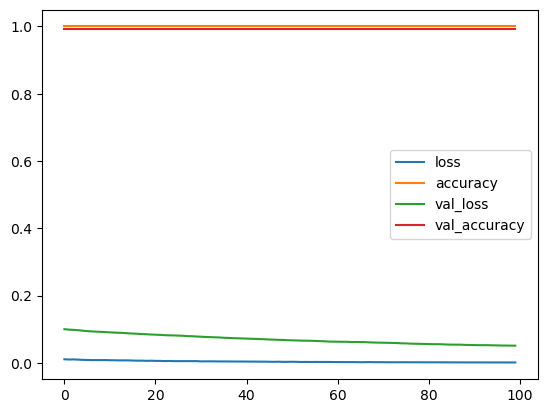

In [101]:
pd.DataFrame(model_1_history.history).plot()


# Transfer learning (USE)

The main idea behind USE is to take advantage of the knowledge learned from large-scale text datasets, such as web pages, books, and Wikipedia. These pre-trained models have learned to represent and understand the semantics of sentences, making them valuable resources for a wide range of NLP tasks.

In [102]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [103]:
from tensorflow.keras import layers

sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape = [],
                                        dtype=tf.string,
                                        trainable = False,
                                        name = "USE")

model_2 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(512, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_of_classes, activation="softmax")
    ], name ="USE_model"
)               

In [104]:
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
optimizer = tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [105]:
model_2_history = model_2.fit(np.array(train_sentences), 
                              train_labels_one_hot,
                              epochs=50,
                              validation_data=(np.array(test_sentences), test_labels_one_hot)) 

Epoch 1/50
34/34 [==============================] - 7s 43ms/step - loss: 2.6958 - accuracy: 0.4185 - val_loss: 1.9520 - val_accuracy: 0.5917
Epoch 2/50
34/34 [==============================] - 1s 22ms/step - loss: 1.1580 - accuracy: 0.7685 - val_loss: 0.7869 - val_accuracy: 0.8250
Epoch 3/50
34/34 [==============================] - 1s 24ms/step - loss: 0.4945 - accuracy: 0.8926 - val_loss: 0.4990 - val_accuracy: 0.8583
Epoch 4/50
34/34 [==============================] - 1s 21ms/step - loss: 0.2796 - accuracy: 0.9454 - val_loss: 0.3547 - val_accuracy: 0.9000
Epoch 5/50
34/34 [==============================] - 1s 21ms/step - loss: 0.1608 - accuracy: 0.9796 - val_loss: 0.1963 - val_accuracy: 0.9667
Epoch 6/50
34/34 [==============================] - 1s 21ms/step - loss: 0.1080 - accuracy: 0.9917 - val_loss: 0.1957 - val_accuracy: 0.9500
Epoch 7/50
34/34 [==============================] - 1s 21ms/step - loss: 0.0748 - accuracy: 0.9972 - val_loss: 0.1473 - val_accuracy: 0.9583
Epoch 8/50
34

In [106]:
model_2.evaluate(np.array(test_sentences), np.array(test_labels_one_hot))

4/4 [==============================] - 0s 10ms/step - loss: 0.0565 - accuracy: 0.9750


[0.05649207904934883, 0.9750000238418579]

<Axes: >

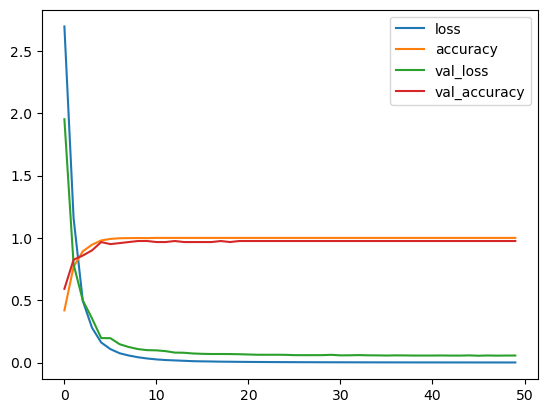

In [107]:
pd.DataFrame(model_2_history.history).plot()

# RESULT



In [108]:
results = {
    'Model': ['Naive Bayes', 'Conv1D', 'Transfer Learning (USE)'],
    'Accuracy': [93.33, 98.33, 97.50],
    'Loss': [None, 0.0925, 0.0679]
}

df_results = pd.DataFrame(results)
print(df_results)

                     Model  Accuracy    Loss
0              Naive Bayes     93.33     NaN
1                   Conv1D     98.33  0.0925
2  Transfer Learning (USE)     97.50  0.0679


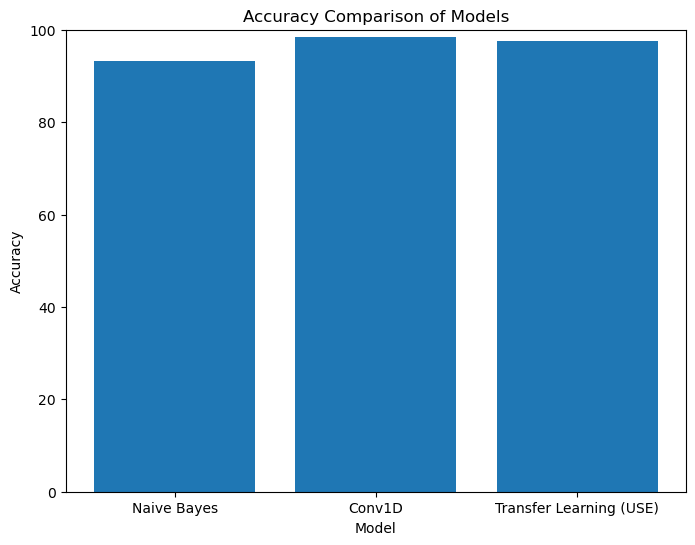

In [109]:
df_results = pd.DataFrame(results)

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.bar(df_results['Model'], df_results['Accuracy'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models')
plt.ylim(0, 100)  # Set the y-axis limits to 0-100
plt.show()

From these results, we can draw the following conclusions:

# Conv1D 
Achieved the highest accuracy of 98.33%, outperforming the other two models. It also had a relatively low loss value of 0.0925.
# Transfer Learning (USE) 
Performed slightly worse than Conv1D but still achieved a high accuracy of 97.50% with a loss value of 0.0679.
# Naive Bayes 
had the lowest accuracy of 93.33%.

Therefore, based on the evaluation results, Conv1D and Transfer Learning (USE) appear to be more effective models for the given task compared to Naive Bayes. Conv1D achieved the highest accuracy, while Transfer Learning (USE) also showed strong performance. However, it's important to consider other factors such as the complexity of implementation, computational requirements, and the specific requirements and constraints of your task before finalizing the choice of model.

# Saving the model

In [110]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [111]:
from joblib import dump

# Assuming you have a trained Conv1D model object named "conv1d_model"
conv1d_model = model_1

# Save the Conv1D model to a file
filename = 'conv1d_model.joblib'
dump(conv1d_model, filename)


['conv1d_model.joblib']

In [117]:
from joblib import load

# Load the Conv1D model from the file
filename = 'conv1d_model.joblib'
conv1d_model = load(filename)

# Use the loaded Conv1D model for predictions
predictions = conv1d_model.predict(X)


38/38 [==============================] - 0s 3ms/step
